In [41]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mopet import mopet

from synchronization import experiments
from synchronization import plots
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Effect of uncorrelated noise on coupled EI networks

Hypothesis
* in certain parameter regimes the EI networks synchronize while within synchronization decreases
* only a fraction of the neurons in a network spike in each cycle, we see a widened voltage distribution

Setup
* 2 coupled network case
* independent noise with varying strengths

Metrics & Visualization
* overlap in peak frequency in power spectrum indicates synchronization
* local and global order parameter quantify synchronization respectively
* optional: mean phase coherence

Run for different noise strengths and plot PSD spectra of all runs.
A handful of parameter sets should suffice to get a first intuition. Afterwards we can do an exhaustive parameter exploration.

In [42]:
factor = 1

default_params = {
  "runtime": 500.0,

  "J_itoi": 5.0 * factor,
  "J_etoe": 0.6 * factor,
  "J_etoi": 1.2 * factor,
  "J_itoe": 7.0 * factor,
  
  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 10.0,
  "poisson_p": 0.6,
  "poisson_mean_input": 600, 
  "poisson_size": 800,
  
  "J_ppee": 0.2,
  "J_ppei": 0.3,

  # if set to default of 0.1 this leads to strange split in frequency band
  "const_delay": 0.2,
   "N_pop": 2,
}

params = {
  # "poisson_variance": np.arange(0.7, 2.5, 0.5),
  "poisson_variance": np.arange(1.0, 20, 0.5),
  "poisson_p": np.arange(0.5, 1.0, .1),
}

In [43]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=params, 
    default_params=default_params,
    hdf_filename=constants.MODELS_PATH + "/uncorrelated_noise_new.h5",
    exploration_name="uncorrelated_noise_new_4"
)

In [25]:
ex.run()

1538461
(pid=72598) Poisson strength: 0.021666666666666667
 77%|███████▋  | 108/140 [06:00<03:03,  5.73s/it](pid=72596) Finished aggregation.
(pid=72604) Net 2 - rate for single neuron 32.4
 78%|███████▊  | 109/140 [06:00<02:06,  4.08s/it](pid=72598) Net 2 - rate for single neuron 17.307692307692307
(pid=72596) Initializing net ...
(pid=72596) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=72596) Poisson strength: 0.021666666666666667
(pid=72608) 0.5 s (100%) simulated in 17s
(pid=72608) ==== Network Run Finished ====
(pid=72608) runtime: 28.3
(pid=72608) Starting Aggregation ...
(pid=72602) Finished aggregation.
 79%|███████▉  | 111/140 [06:00<01:02,  2.15s/it](pid=72602) Initializing net ...
(pid=72602) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=72602) Poisson strength: 0.021666666666666667
(pid=72596) Net 2 - rate for single neuron 20.769230769230766
(pid=72609) Finished aggregation.
(pid=72604) Initialization time: 2

In [44]:
ex.load_results(all=True)

100%|██████████| 140/140 [00:16<00:00,  8.28it/s]


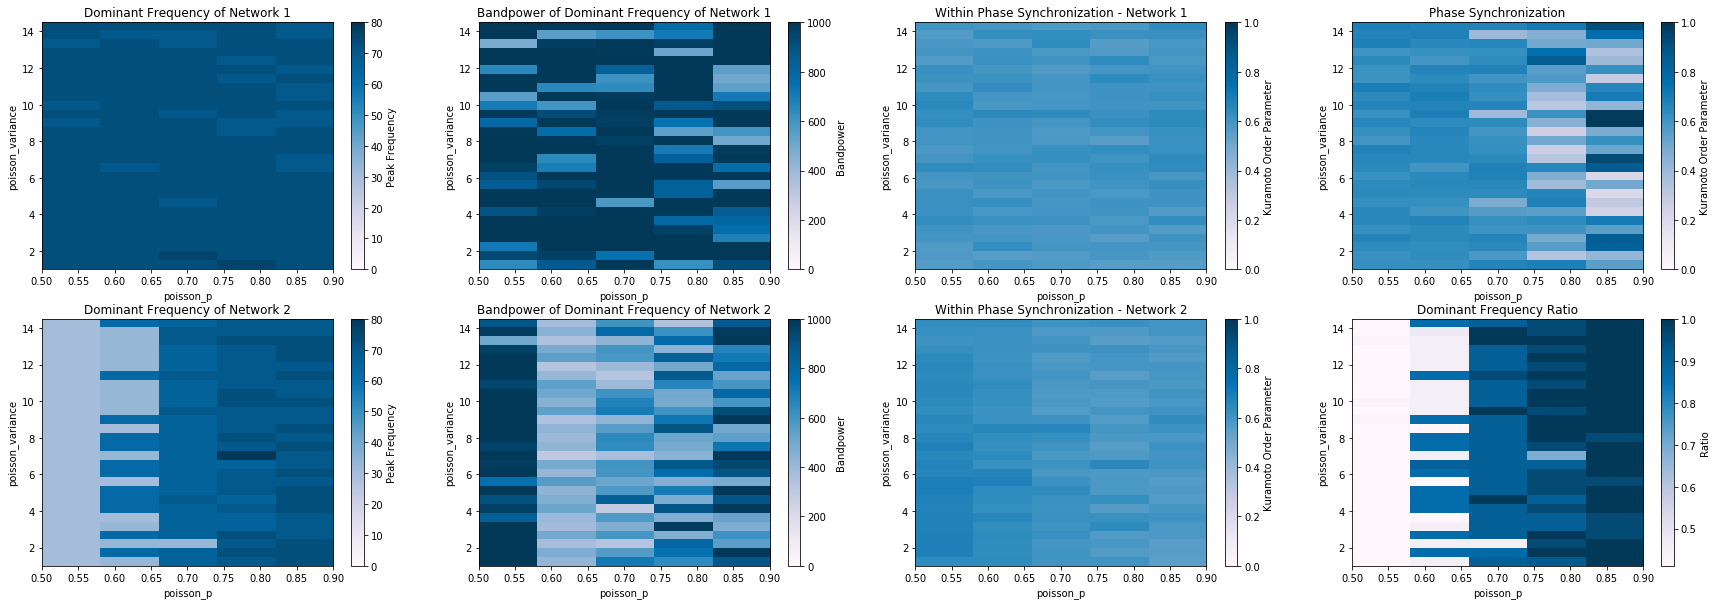

In [47]:
plots.plot_exploration(ex, vmax_freq=80, vmin_ratio=None)

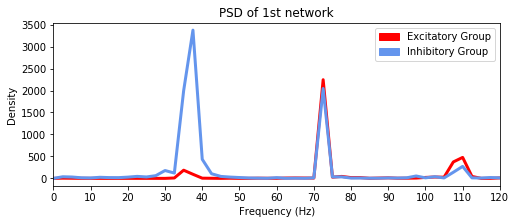

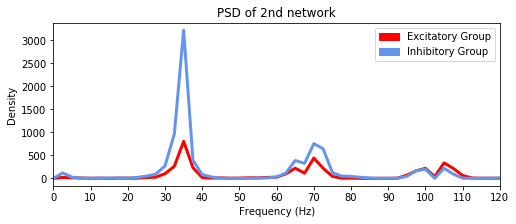

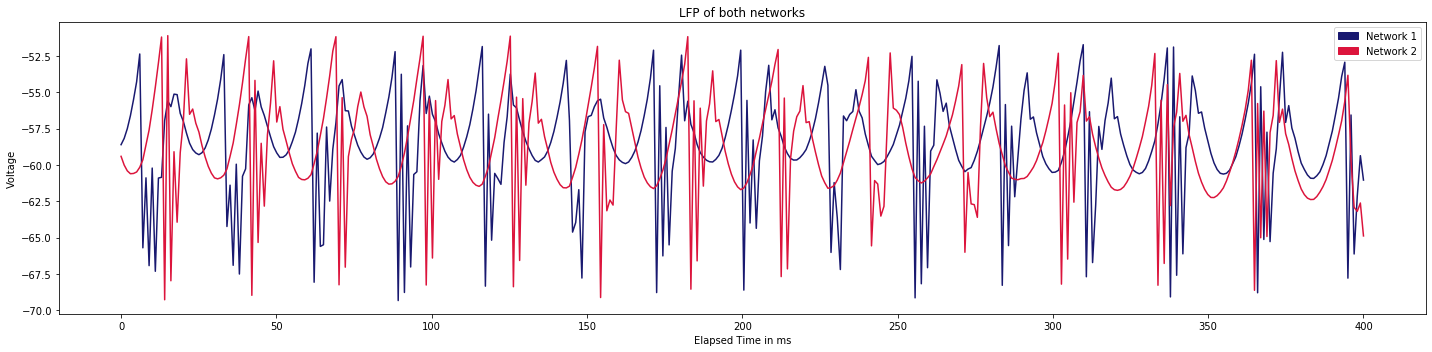

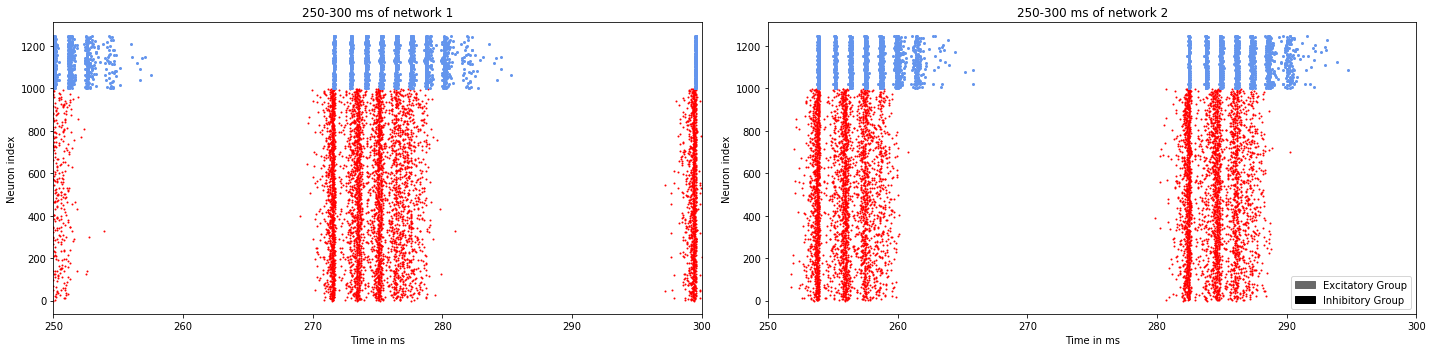

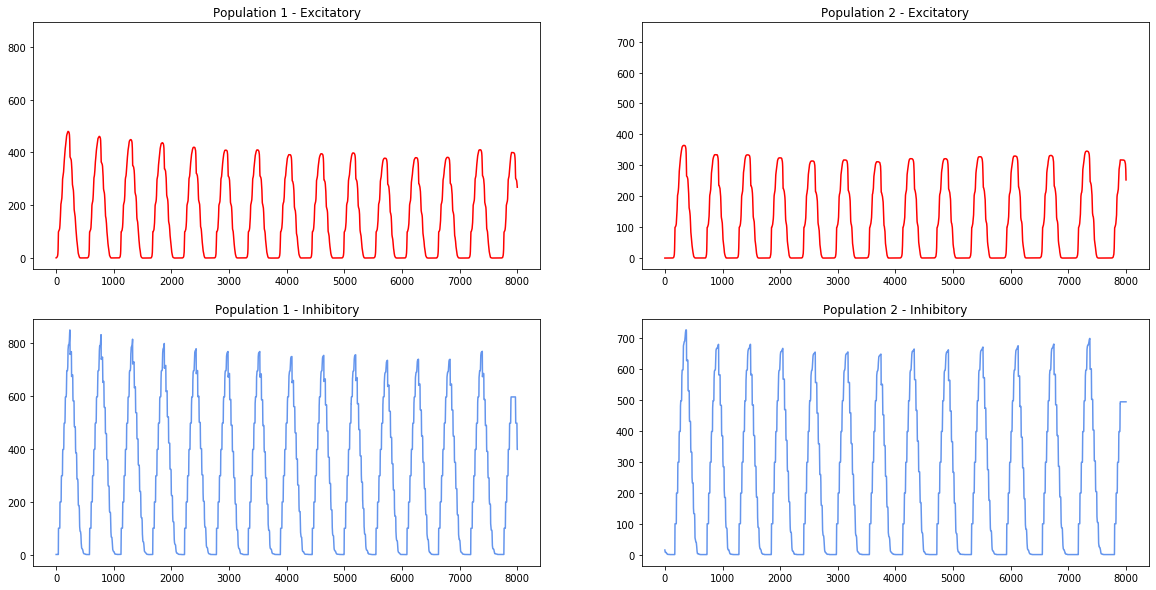

In [36]:
plots.plot_results(ex.get_run(82), pop_rates=True)

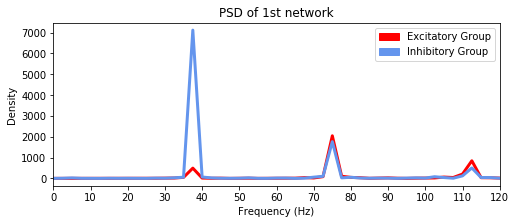

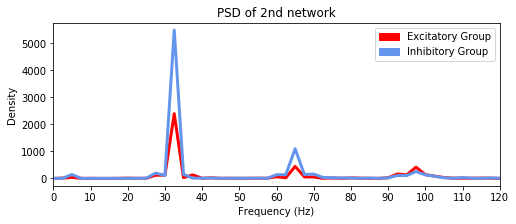

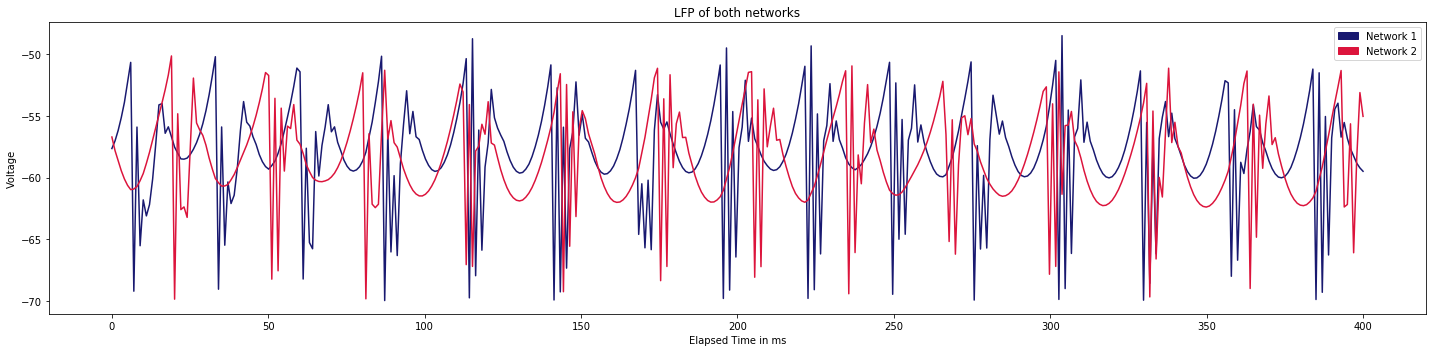

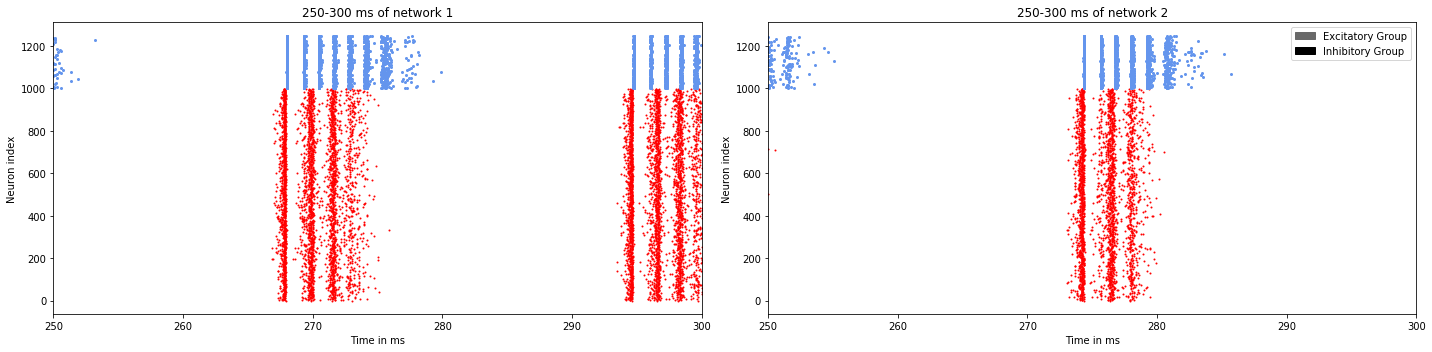

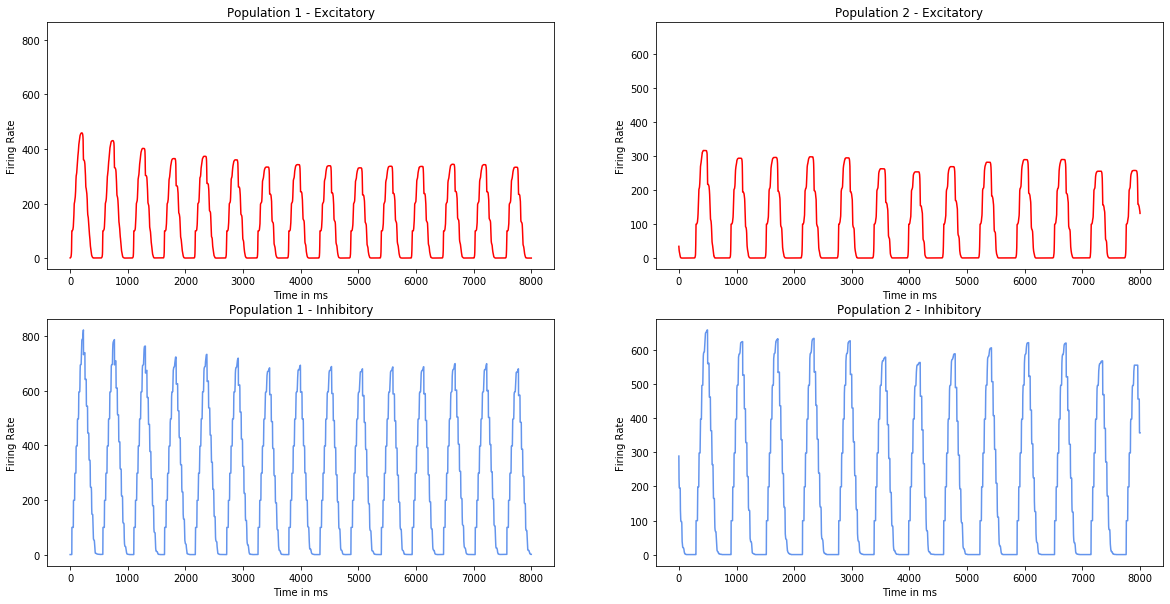

In [40]:
plots.plot_results(ex.get_run(1), pop_rates=True)